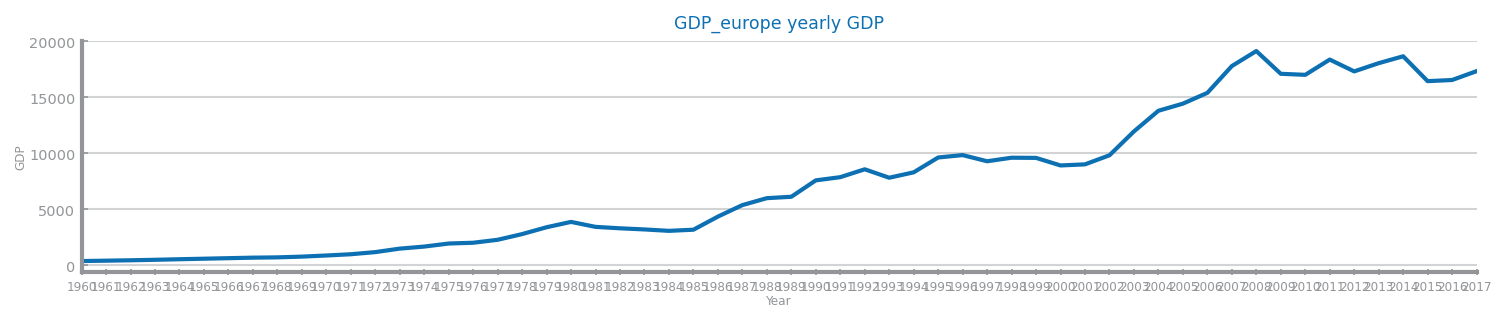

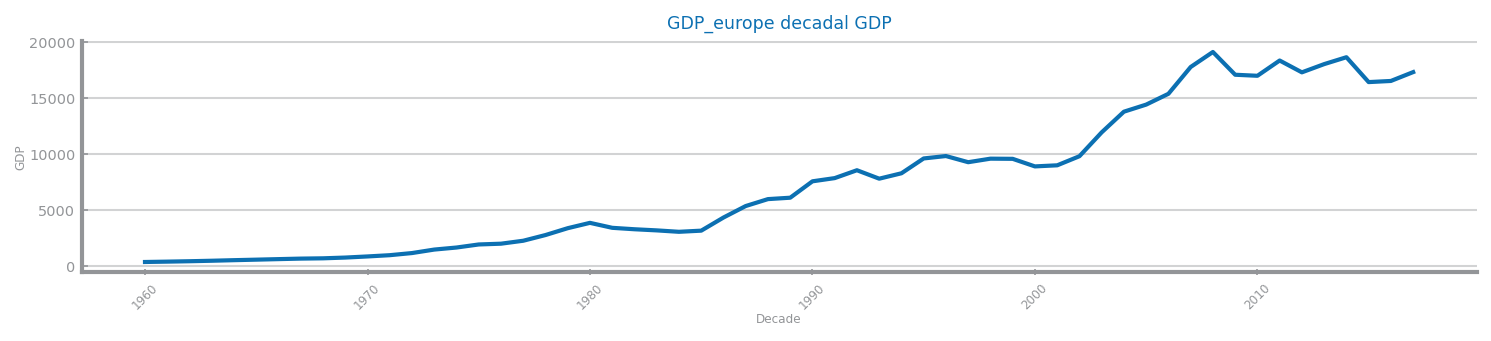

In [2]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT

# File details
file_tag = "GDP_europe"
filename = "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv"
index = "Year"
target = "GDP"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=",",  # Comma-separated values
    decimal=".",  # Use period as decimal separator
    parse_dates=[index],  # Parse the 'Year' column as datetime
    infer_datetime_format=True,  # Infer the datetime format automatically
)
data.set_index(index, inplace=True)

# Extract the GDP series
series: Series = data[target]

# Visualize the original series (yearly granularity)
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.year.to_list(),  # Extract years for x-axis
    series.to_list(),  # GDP values for y-axis
    xlabel="Year",  # Label x-axis as "Year"
    ylabel=target,  # Label y-axis as "GDP"
    title=f"{file_tag} yearly {target}",
)
show()

# Aggregate the series to decadal granularity using sum
ss_agg: Series = ts_aggregation_by(series, gran_level="10Y", agg_func="sum")

# Visualize the decadal aggregated series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_agg.index.to_list(),  # Extract decades for x-axis
    ss_agg.to_list(),  # Aggregated GDP values for y-axis
    xlabel="Decade",  # Label x-axis as "Decade"
    ylabel=target,  # Label y-axis as "GDP"
    title=f"{file_tag} decadal {target}",
)
show()


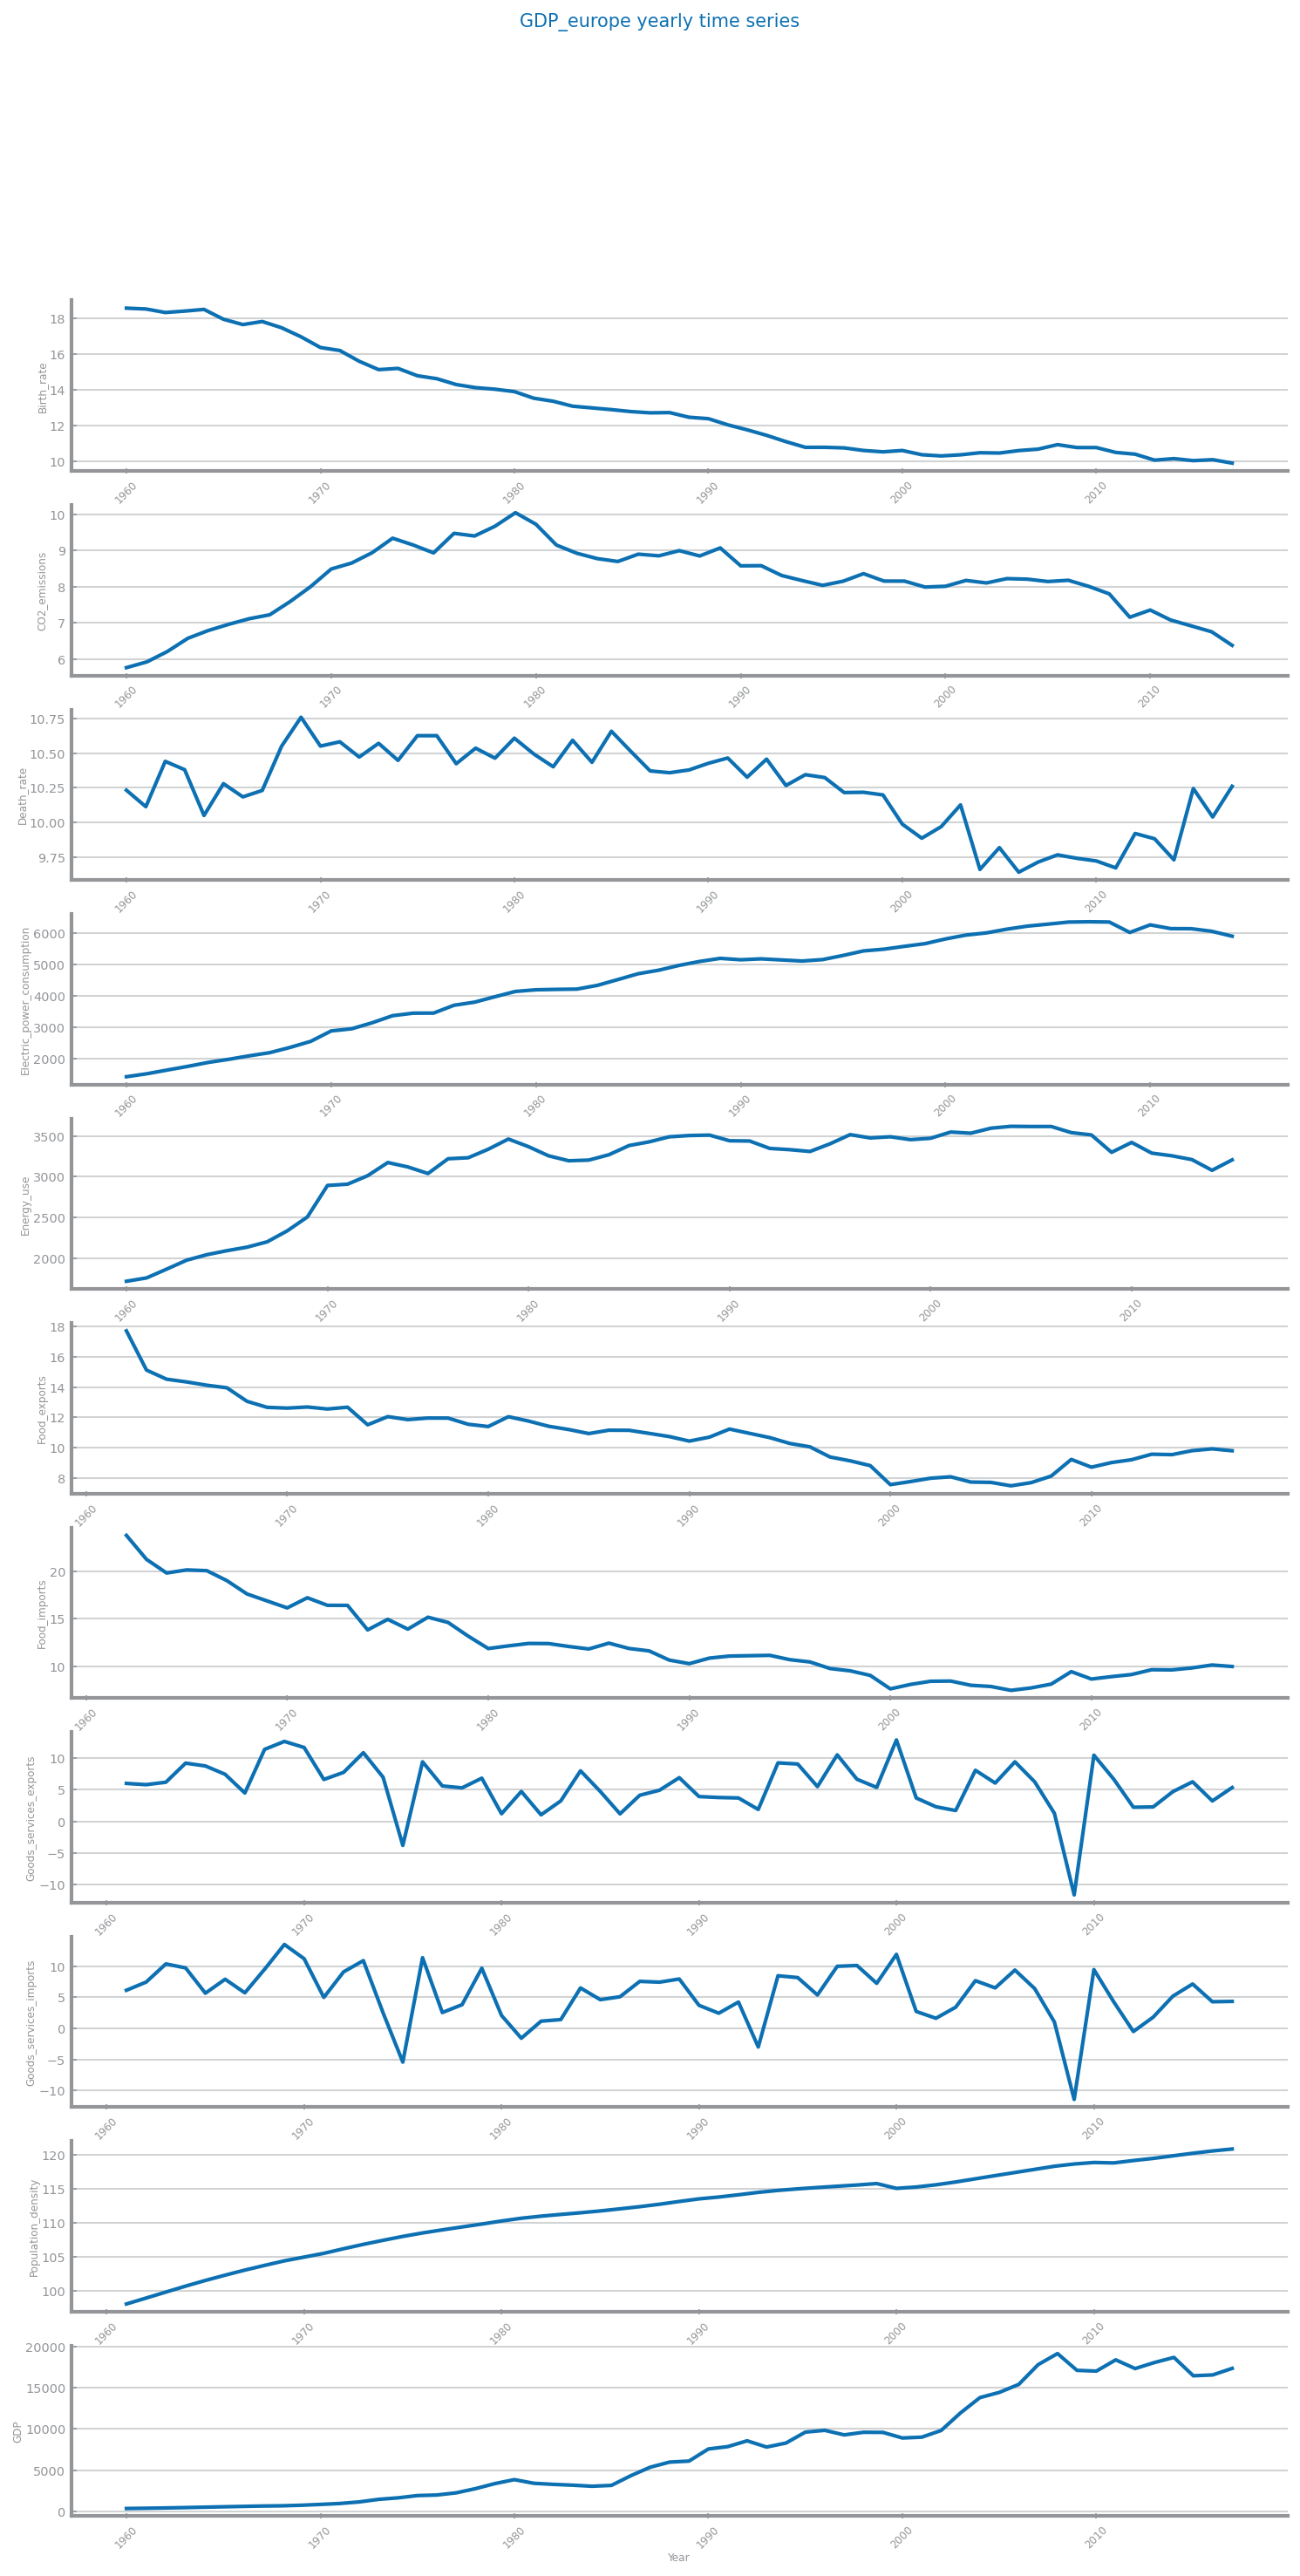

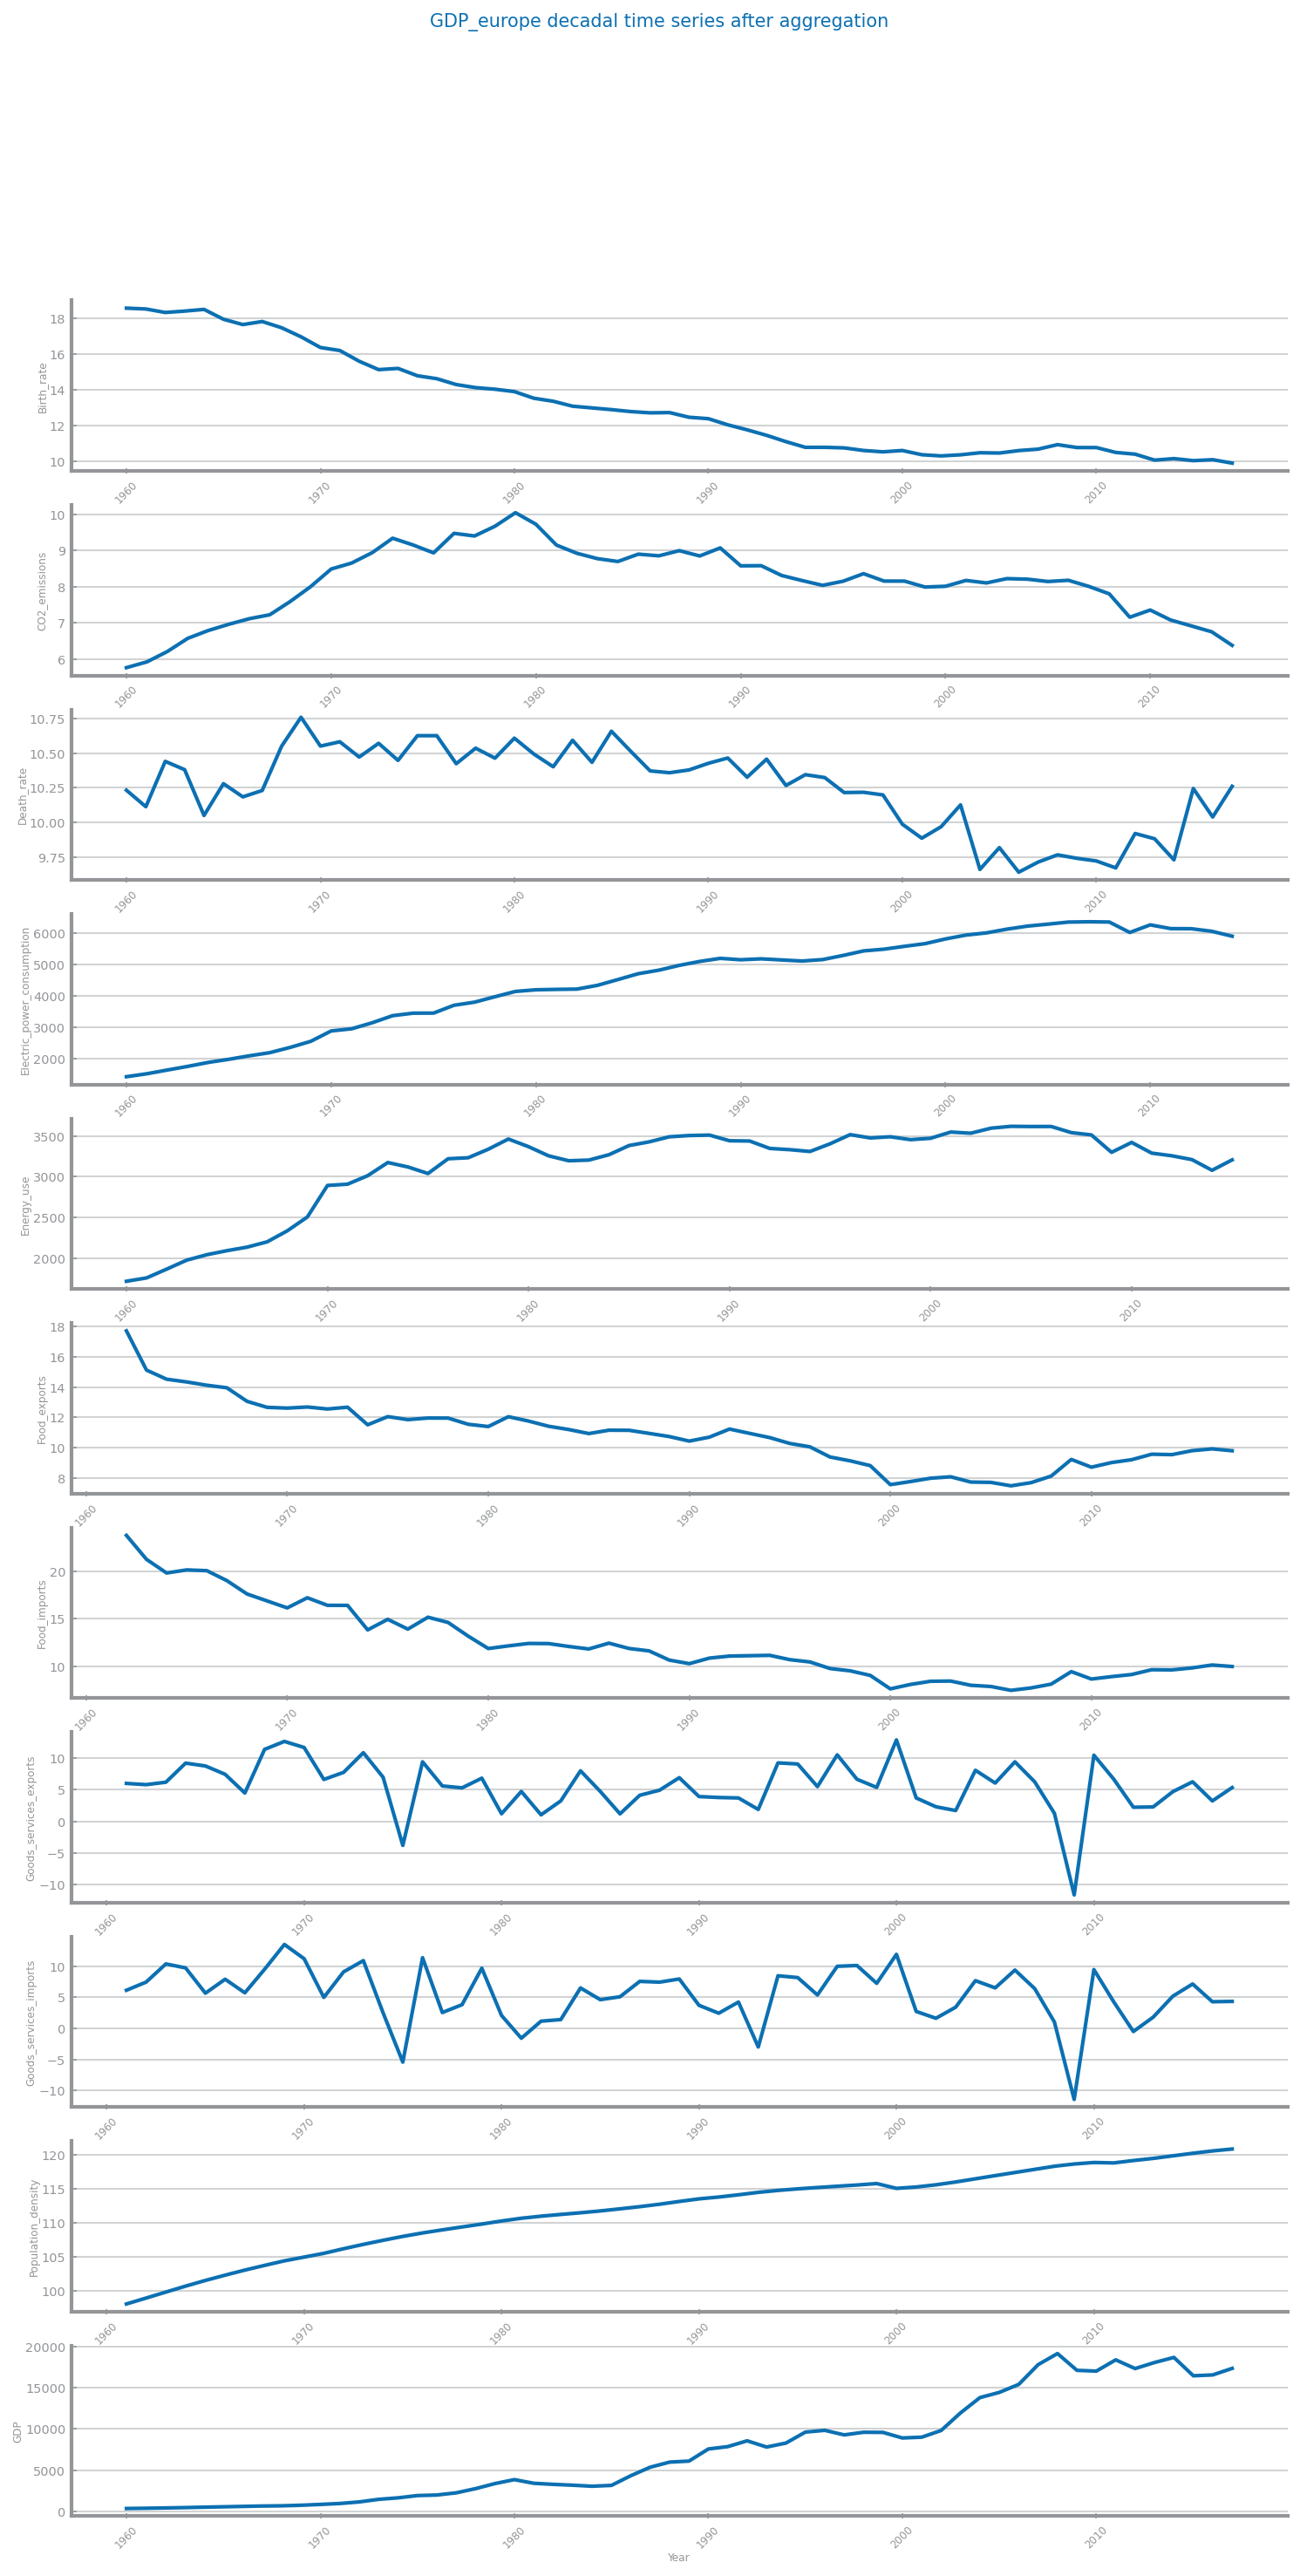

In [3]:
from dslabs_functions import plot_ts_multivariate_chart, ts_aggregation_by
from pandas import DataFrame

# Visualize the original multivariate series (yearly granularity)
plot_ts_multivariate_chart(data, title=f"{file_tag} yearly time series")

# Aggregate the multivariate time series to decadal granularity using mean
agg_df: DataFrame = ts_aggregation_by(data, gran_level="10Y", agg_func="mean")

# Visualize the decadal aggregated multivariate series
plot_ts_multivariate_chart(agg_df, title=f"{file_tag} decadal time series after aggregation")
show()
